In [ ]:
import pandas as pd
import numpy as np
import regex as re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import random

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

!pip install wordcloud
from wordcloud import WordCloud

!pip install spacy
import spacy
from spacy.lang.en import English
import pickle
import gensim
from gensim import corpora

!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IR_4034_Proj/Data/labelled.csv')
df.head()

,Column1,Datetime,TweetId,Text,Subjectivity,Polarity,Unnamed: 6,Unnamed: 7
0,0,2020-12-31 22:57:34+00:00,1.340000e+18,WHO lists Pfizer-BioNTech COVID-19 vaccine for...,0,0,NaN,NaN
1,1,2020-12-31 22:27:32+00:00,1.340000e+18,Commentary: Pharmaceutical firms saved the wor...,1,1,NaN,NaN
2,2,2020-12-31 21:16:03+00:00,1.340000e+18,"Under fire, France pledges speedier COVID-19 v...",1,0,NaN,NaN
3,3,2020-12-31 19:48:03+00:00,1.340000e+18,EU reviews BioNTech request for 'extra dose' o...,0,0,NaN,NaN
4,4,2020-12-31 18:10:34+00:00,1.340000e+18,US COVID-19 vaccinations in 2020 fall far shor...,1,0,NaN,NaN


,Column1,Datetime,TweetId,Text,Subjectivity,Polarity,Unnamed: 6,Unnamed: 7
0,0,2020-12-31 22:57:34+00:00,1.340000e+18,WHO lists Pfizer-BioNTech COVID-19 vaccine for emergency use https://t.co/T5Z7wsVQQc https://t.co/NPkPodAhQX,0,0,NaN,NaN
1,1,2020-12-31 22:27:32+00:00,1.340000e+18,Commentary: Pharmaceutical firms saved the world with COVID-19 vaccine in record time. But credit goes to others too https://t.co/I77T2FoZRJ https://t.co/6B3HNJPmnM,1,1,NaN,NaN
2,2,2020-12-31 21:16:03+00:00,1.340000e+18,"Under fire, France pledges speedier COVID-19 vaccination rollout https://t.co/TxkEsMXw2H https://t.co/6hX70DU259",1,0,NaN,NaN
3,3,2020-12-31 19:48:03+00:00,1.340000e+18,EU reviews BioNTech request for 'extra dose' of COVID-19 vaccine https://t.co/leiQJjZdKS https://t.co/tHaSTnkFlT,0,0,NaN,NaN
4,4,2020-12-31 18:10:34+00:00,1.340000e+18,US COVID-19 vaccinations in 2020 fall far short of target of 20 million people https://t.co/EPVDME8pR6 https://t.co/KgsYkm4Wh9,1,0,NaN,NaN


# Preprocessing of Data

Preprocessing functions

In [ ]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'pic.twitter\S+', ' ', text)
    text = re.sub(r'#', '', text)
    text = text.lower()

    return text

def clean_urls(review):
    review = review.split()
    review = ' '.join([word for word in review if not re.match('^http', word)])

    return review

def decontracted(text):
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"it\'s", "it is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\“", "", text)
    text = re.sub(r"\”", "", text)
    text = re.sub(r"\…", "", text)

    return text


def remove_punc(tweet):
    tweet =  tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = ' '.join([word for word in tweet.split()])
    tweet = tweet.lower()
    
    return tweet

Remove unused columns

In [ ]:
df = df[["TweetId", "Text", "Subjectivity", "Polarity"]]
df.head()

,TweetId,Text,Subjectivity,Polarity
0,1.340000e+18,WHO lists Pfizer-BioNTech COVID-19 vaccine for...,0,0
1,1.340000e+18,Commentary: Pharmaceutical firms saved the wor...,1,1
2,1.340000e+18,"Under fire, France pledges speedier COVID-19 v...",1,0
3,1.340000e+18,EU reviews BioNTech request for 'extra dose' o...,0,0
4,1.340000e+18,US COVID-19 vaccinations in 2020 fall far shor...,1,0


,TweetId,Text,Subjectivity,Polarity
0,1.340000e+18,WHO lists Pfizer-BioNTech COVID-19 vaccine for emergency use https://t.co/T5Z7wsVQQc https://t.co/NPkPodAhQX,0,0
1,1.340000e+18,Commentary: Pharmaceutical firms saved the world with COVID-19 vaccine in record time. But credit goes to others too https://t.co/I77T2FoZRJ https://t.co/6B3HNJPmnM,1,1
2,1.340000e+18,"Under fire, France pledges speedier COVID-19 vaccination rollout https://t.co/TxkEsMXw2H https://t.co/6hX70DU259",1,0
3,1.340000e+18,EU reviews BioNTech request for 'extra dose' of COVID-19 vaccine https://t.co/leiQJjZdKS https://t.co/tHaSTnkFlT,0,0
4,1.340000e+18,US COVID-19 vaccinations in 2020 fall far short of target of 20 million people https://t.co/EPVDME8pR6 https://t.co/KgsYkm4Wh9,1,0


Preprocess Text

In [ ]:
df['Text'] = df['Text'].apply(clean_urls).apply(clean_text).apply(decontracted).apply(remove_punc)

In [ ]:
df.head()

,TweetId,Text,Subjectivity,Polarity
0,1.340000e+18,who lists pfizer biontech covid vaccine for em...,0,0
1,1.340000e+18,commentary pharmaceutical firms saved the worl...,1,1
2,1.340000e+18,under fire france pledges speedier covid vacci...,1,0
3,1.340000e+18,eu reviews biontech request for extra dose of ...,0,0
4,1.340000e+18,us covid vaccinations in fall far short of tar...,1,0


,TweetId,Text,Subjectivity,Polarity
0,1.340000e+18,who lists pfizer biontech covid vaccine for emergency use,0,0
1,1.340000e+18,commentary pharmaceutical firms saved the world with covid vaccine in record time but credit goes to others too,1,1
2,1.340000e+18,under fire france pledges speedier covid vaccination rollout,1,0
3,1.340000e+18,eu reviews biontech request for extra dose of covid vaccine,0,0
4,1.340000e+18,us covid vaccinations in fall far short of target of million people,1,0


## **Stemming**


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Stemming function

In [ ]:
def stem_text(x):
    stemmer = PorterStemmer()
    x = word_tokenize(x)
    stem = ''
    
    for i in x:
        stem += stemmer.stem(i) + ' '
        
    return stem

In [ ]:
df['stemmed_text'] = df['Text'].apply(stem_text)
df.head()

,TweetId,Text,Subjectivity,Polarity,stemmed_text
0,1.340000e+18,who lists pfizer biontech covid vaccine for em...,0,0,who list pfizer biontech covid vaccin for emer...
1,1.340000e+18,commentary pharmaceutical firms saved the worl...,1,1,commentari pharmaceut firm save the world with...
2,1.340000e+18,under fire france pledges speedier covid vacci...,1,0,under fire franc pledg speedier covid vaccin r...
3,1.340000e+18,eu reviews biontech request for extra dose of ...,0,0,eu review biontech request for extra dose of c...
4,1.340000e+18,us covid vaccinations in fall far short of tar...,1,0,us covid vaccin in fall far short of target of...


,TweetId,Text,Subjectivity,Polarity,stemmed_text
0,1.340000e+18,who lists pfizer biontech covid vaccine for emergency use,0,0,who list pfizer biontech covid vaccin for emerg use
1,1.340000e+18,commentary pharmaceutical firms saved the world with covid vaccine in record time but credit goes to others too,1,1,commentari pharmaceut firm save the world with covid vaccin in record time but credit goe to other too
2,1.340000e+18,under fire france pledges speedier covid vaccination rollout,1,0,under fire franc pledg speedier covid vaccin rollout
3,1.340000e+18,eu reviews biontech request for extra dose of covid vaccine,0,0,eu review biontech request for extra dose of covid vaccin
4,1.340000e+18,us covid vaccinations in fall far short of target of million people,1,0,us covid vaccin in fall far short of target of million peopl


## **Lemmatization**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemmatize_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]) for tweet in corpus]

In [ ]:
df['lemmatized_text'] = lemmatize_text(df['Text'])
df.head()

,TweetId,Text,Subjectivity,Polarity,stemmed_text,lemmatized_text
0,1.340000e+18,who lists pfizer biontech covid vaccine for em...,0,0,who list pfizer biontech covid vaccin for emer...,who list pfizer biontech covid vaccine for eme...
1,1.340000e+18,commentary pharmaceutical firms saved the worl...,1,1,commentari pharmaceut firm save the world with...,commentary pharmaceutical firm saved the world...
2,1.340000e+18,under fire france pledges speedier covid vacci...,1,0,under fire franc pledg speedier covid vaccin r...,under fire france pledge speedier covid vaccin...
3,1.340000e+18,eu reviews biontech request for extra dose of ...,0,0,eu review biontech request for extra dose of c...,eu review biontech request for extra dose of c...
4,1.340000e+18,us covid vaccinations in fall far short of tar...,1,0,us covid vaccin in fall far short of target of...,u covid vaccination in fall far short of targe...


,TweetId,Text,Subjectivity,Polarity,stemmed_text,lemmatized_text
0,1.340000e+18,who lists pfizer biontech covid vaccine for emergency use,0,0,who list pfizer biontech covid vaccin for emerg use,who list pfizer biontech covid vaccine for emergency use
1,1.340000e+18,commentary pharmaceutical firms saved the world with covid vaccine in record time but credit goes to others too,1,1,commentari pharmaceut firm save the world with covid vaccin in record time but credit goe to other too,commentary pharmaceutical firm saved the world with covid vaccine in record time but credit go to others too
2,1.340000e+18,under fire france pledges speedier covid vaccination rollout,1,0,under fire franc pledg speedier covid vaccin rollout,under fire france pledge speedier covid vaccination rollout
3,1.340000e+18,eu reviews biontech request for extra dose of covid vaccine,0,0,eu review biontech request for extra dose of covid vaccin,eu review biontech request for extra dose of covid vaccine
4,1.340000e+18,us covid vaccinations in fall far short of target of million people,1,0,us covid vaccin in fall far short of target of million peopl,u covid vaccination in fall far short of target of million people


## **Removal of StopWords**

In [ ]:
stop = stopwords.words('english')
additional_stopwords = ["'s","...","'ve","``","''","'m",'--',"'ll","'d"]
stop = set(stop + additional_stopwords)

def remove_stopwords(x):
    x = word_tokenize(x)
    store_words = ''
    
    for i in x:
        if i not in stop:
            store_words += i + ' '
            
    return store_words

In [ ]:
df['cleaned_text'] = df['Text'].apply(remove_stopwords)
df['cleaned_stemmed_text'] = df['stemmed_text'].apply(remove_stopwords)
df['cleaned_lemmatized_text'] = df['lemmatized_text'].apply(remove_stopwords)

## **Word Count**

In [ ]:
wordcount = df['Text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus.".format(wordcount))

wordcount = df['stemmed_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after stemming.".format(wordcount))

wordcount = df['cleaned_stemmed_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after stemming and removal of stopwords.".format(wordcount))

wordcount = df['lemmatized_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after lemmatization.".format(wordcount))

wordcount = df['cleaned_lemmatized_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after lemmatization and removal of stopwords.".format(wordcount))

wordcount = df['cleaned_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after removal of stopwords.".format(wordcount))

There are 49110 words in the corpus.
There are 49115 words in the corpus after stemming.
There are 33245 words in the corpus after stemming and removal of stopwords.
There are 49110 words in the corpus after lemmatization.
There are 32833 words in the corpus after lemmatization and removal of stopwords.
There are 32434 words in the corpus after removal of stopwords.
There are 49110 words in the corpus.
There are 49115 words in the corpus after stemming.
There are 33245 words in the corpus after stemming and removal of stopwords.
There are 49110 words in the corpus after lemmatization.
There are 32833 words in the corpus after lemmatization and removal of stopwords.
There are 32434 words in the corpus after removal of stopwords.


## **No. of Unique Words**

In [ ]:
df.Text.str.split(expand=True).stack().value_counts()

covid       2766
the         1764
to          1489
of          1106
in          1092
            ... 
blended        1
sporting       1
mccy           1
tong           1
networks       1
Length: 6001, dtype: int64

covid       2766
the         1764
to          1489
of          1106
in          1092
            ... 
blended     1   
sporting    1   
mccy        1   
tong        1   
networks    1   
Length: 6001, dtype: int64

## **Calculate  inter-annotator agreement**

In [ ]:
labelled2raters_df = pd.read_csv('/content/drive/MyDrive/IR_4034_Proj/Data/labelled_2raters.csv')

In [ ]:
rater_1 = labelled2raters_df['Rater_1'].to_numpy()
rater_2 = labelled2raters_df['Rater_2'].to_numpy()

from sklearn.metrics import cohen_kappa_score
kappa_boi = cohen_kappa_score(rater_1, rater_2)
print("The inter-annotator score between 2 raters is {}".format(kappa_boi))

The inter-annotator score between 2 raters is 0.9610651845332726
The inter-annotator score between 2 raters is 0.9610651845332726


# **Naive Bayes Classification**

In [ ]:
##testcode = '''
def naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing):

    naiveBayes_model = MultinomialNB().fit(tweet_matrix, y_train)
    result = naiveBayes_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: Naive Bayes Classification")
    print("Preprocessing Function: ", preprocessing)
    print("==================================================")
    print()
    plt.title("Confusion matrix of Naive Bayes Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score = metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)
    
    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()
    
    
    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(naiveBayes_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(naiveBayes_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(naiveBayes_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()
#'''
    

# **K-Nearest Neighbour (KNN) Classification**

In [ ]:
def KNNClassification(x_train, x_test, y_train, y_test, preprocessing):
    
    metric = ['euclidean', 'manhattan', 'cosine']
    neighbors = list(range(1,30))
    leaf_size = list(range(1,50))
    weight = ['uniform', 'distance']
    param_grid = {'metric' : metric, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}
    
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_
    
    
    knn_model = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], metric= grid_search.best_params_['metric'], leaf_size = grid_search.best_params_['leaf_size'], weights = grid_search.best_params_['weights'])
    knn_model.fit(tweet_matrix, y_train)   
    
    result = knn_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: K-Nearest Neighbour Classification")
    print("Best parameters:", grid_search.best_params_)
    print("Preprocessing Function: ", preprocessing)
    print("==================================================")
    print()
    plt.title("Confusion matrix of KNN Classification of tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)

    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()
  
    
    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(knn_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(knn_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(knn_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()
    

# **Support Vector Machine (SVM) Classification**

In [ ]:
def SVMClassification(x_train, x_test, y_train, y_test, preprocessing):

    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.05, 0.1, 0.15, 0.20, 0.25]
    degrees = [0, 1, 2, 3, 4, 5, 6]
    kernels = ['rbf', 'linear', 'poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees, 'kernel' : kernels}
    
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv = 3)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_

    SVM_model = svm.SVC(C = grid_search.best_params_['C'], kernel = grid_search.best_params_['kernel'], gamma = grid_search.best_params_['gamma'], degree = grid_search.best_params_['degree'])
    SVM_model.fit(tweet_matrix, y_train)
    
    result = SVM_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: Support Vector Machine Classification")
    print("Preprocessing Function: ", preprocessing)
    print("Best parameters:", grid_search.best_params_)
    print("==================================================")
    print()
    plt.title("Confusion matrix of SVM Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)

    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()

    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(SVM_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(SVM_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(SVM_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()
    
    

# **Decision Tree Classification**

In [ ]:
def decisionTreeClassification(x_train, x_test, y_train, y_test, preprocessing):
    
    clf = DecisionTreeClassifier() 

    param_grid = { 
        'criterion': ['gini','entropy'],
        'splitter': ['best','random'],
        'max_features': ['auto','sqrt','log2']
    }
    
    grid_search = GridSearchCV(clf, param_grid, cv= 3)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_

    decisionTree_model = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],splitter = grid_search.best_params_['splitter'], max_features = grid_search.best_params_['max_features'])
    decisionTree_model.fit(tweet_matrix, y_train)

    result = decisionTree_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)


    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: Decision Tree Classification")
    print("Preprocessing Function: ", preprocessing)
    print("Best parameters:", grid_search.best_params_)
    print("==================================================")
    print()
    plt.title("Confusion matrix of Decision Tree Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)

    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()

    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(decisionTree_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(decisionTree_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(decisionTree_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()
    
    

# ***Subjectivity Classification*** 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## **Experiment to find the best preprocessing and vectorizer for Subjectivity Classification**

Model: Naive Bayes Classification
Preprocessing Function:  Text



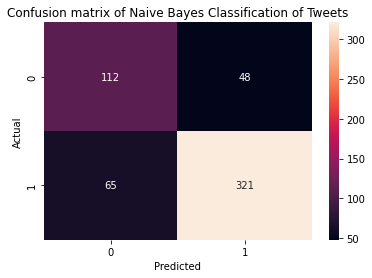

------------ Evaluation Metrics ----------------

F1 score: 0.850
Precision score: 0.870
Recall score: 0.832
Average precision-recall score: 0.842

--------- 5 fold cross validation ----------------

F1 score: 0.849
Precision score: 0.752
Recall score: 0.974

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



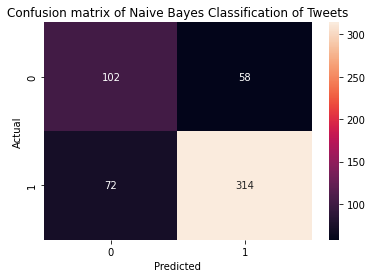

------------ Evaluation Metrics ----------------

F1 score: 0.828
Precision score: 0.844
Recall score: 0.813
Average precision-recall score: 0.819

--------- 5 fold cross validation ----------------

F1 score: 0.844
Precision score: 0.744
Recall score: 0.977

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



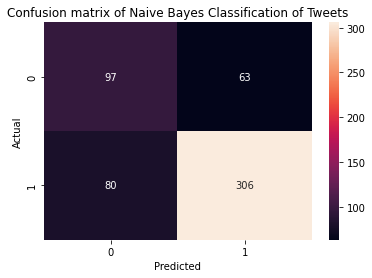

------------ Evaluation Metrics ----------------

F1 score: 0.811
Precision score: 0.829
Recall score: 0.793
Average precision-recall score: 0.804

--------- 5 fold cross validation ----------------

F1 score: 0.847
Precision score: 0.745
Recall score: 0.982

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



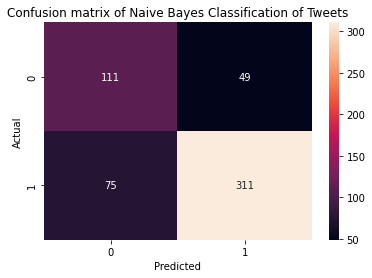

------------ Evaluation Metrics ----------------

F1 score: 0.834
Precision score: 0.864
Recall score: 0.806
Average precision-recall score: 0.833

--------- 5 fold cross validation ----------------

F1 score: 0.848
Precision score: 0.750
Recall score: 0.977

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



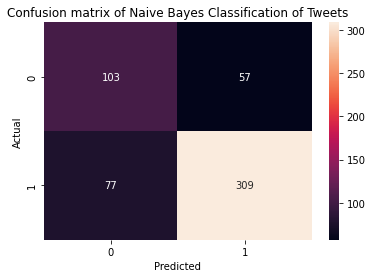

------------ Evaluation Metrics ----------------

F1 score: 0.822
Precision score: 0.844
Recall score: 0.801
Average precision-recall score: 0.817

--------- 5 fold cross validation ----------------

F1 score: 0.853
Precision score: 0.754
Recall score: 0.982

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



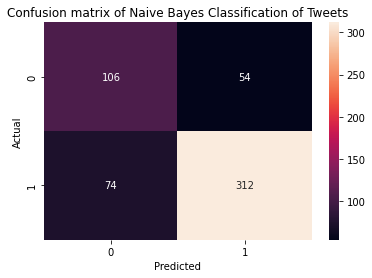

------------ Evaluation Metrics ----------------

F1 score: 0.830
Precision score: 0.852
Recall score: 0.808
Average precision-recall score: 0.825

--------- 5 fold cross validation ----------------

F1 score: 0.860
Precision score: 0.761
Recall score: 0.990

Model: Naive Bayes Classification
Preprocessing Function:  Text



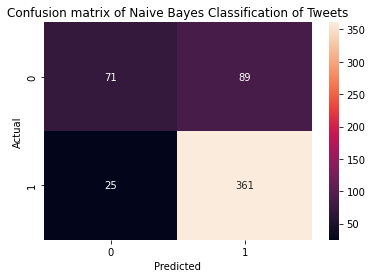

------------ Evaluation Metrics ----------------

F1 score: 0.864
Precision score: 0.802
Recall score: 0.935
Average precision-recall score: 0.796

--------- 5 fold cross validation ----------------

F1 score: 0.829
Precision score: 0.709
Recall score: 0.997

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



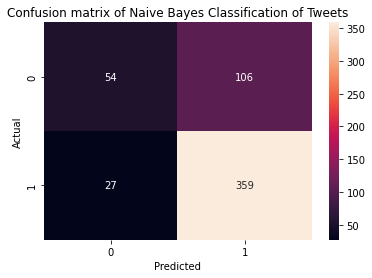

------------ Evaluation Metrics ----------------

F1 score: 0.844
Precision score: 0.772
Recall score: 0.930
Average precision-recall score: 0.767

--------- 5 fold cross validation ----------------

F1 score: 0.828
Precision score: 0.708
Recall score: 0.997

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



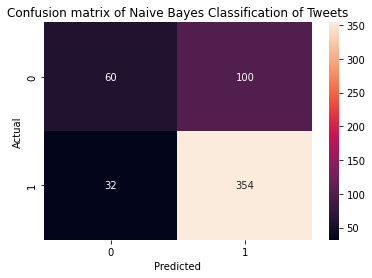

------------ Evaluation Metrics ----------------

F1 score: 0.843
Precision score: 0.780
Recall score: 0.917
Average precision-recall score: 0.774

--------- 5 fold cross validation ----------------

F1 score: 0.832
Precision score: 0.712
Recall score: 1.000

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



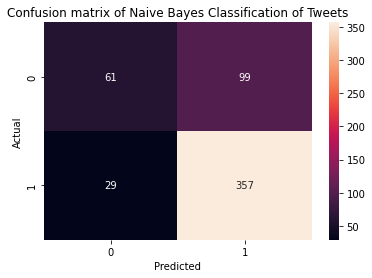

------------ Evaluation Metrics ----------------

F1 score: 0.848
Precision score: 0.783
Recall score: 0.925
Average precision-recall score: 0.777

--------- 5 fold cross validation ----------------

F1 score: 0.828
Precision score: 0.708
Recall score: 0.997

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



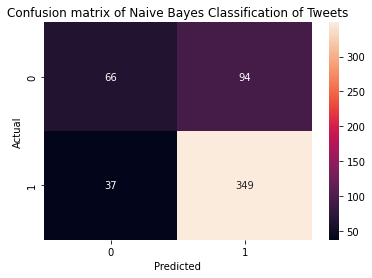

------------ Evaluation Metrics ----------------

F1 score: 0.842
Precision score: 0.788
Recall score: 0.904
Average precision-recall score: 0.780

--------- 5 fold cross validation ----------------

F1 score: 0.831
Precision score: 0.711
Recall score: 1.000

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



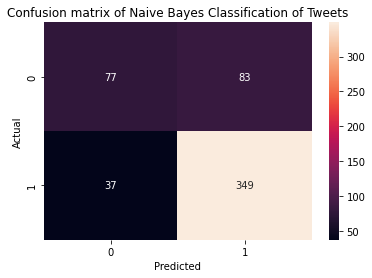

------------ Evaluation Metrics ----------------

F1 score: 0.853
Precision score: 0.808
Recall score: 0.904
Average precision-recall score: 0.798

--------- 5 fold cross validation ----------------

F1 score: 0.834
Precision score: 0.715
Recall score: 1.000

Model: Naive Bayes Classification
Preprocessing Function:  Text



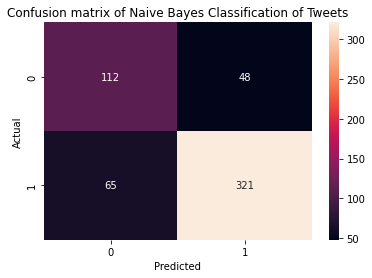

------------ Evaluation Metrics ----------------

F1 score: 0.850
Precision score: 0.870
Recall score: 0.832
Average precision-recall score: 0.842

--------- 5 fold cross validation ----------------

F1 score: 0.849
Precision score: 0.752
Recall score: 0.974

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



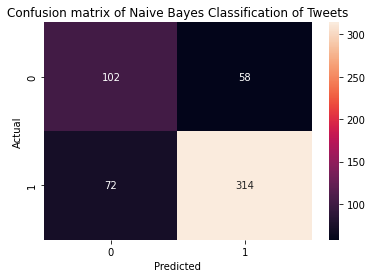

------------ Evaluation Metrics ----------------

F1 score: 0.828
Precision score: 0.844
Recall score: 0.813
Average precision-recall score: 0.819

--------- 5 fold cross validation ----------------

F1 score: 0.844
Precision score: 0.744
Recall score: 0.977

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



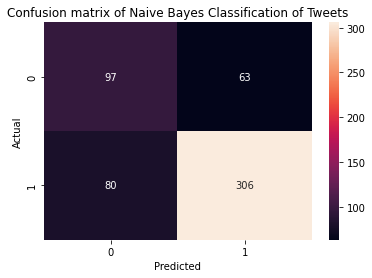

------------ Evaluation Metrics ----------------

F1 score: 0.811
Precision score: 0.829
Recall score: 0.793
Average precision-recall score: 0.804

--------- 5 fold cross validation ----------------

F1 score: 0.847
Precision score: 0.745
Recall score: 0.982

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



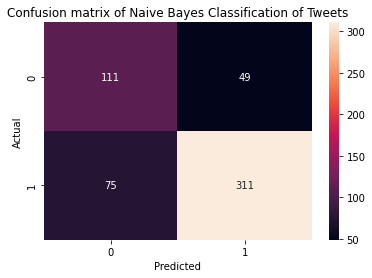

------------ Evaluation Metrics ----------------

F1 score: 0.834
Precision score: 0.864
Recall score: 0.806
Average precision-recall score: 0.833

--------- 5 fold cross validation ----------------

F1 score: 0.848
Precision score: 0.750
Recall score: 0.977

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



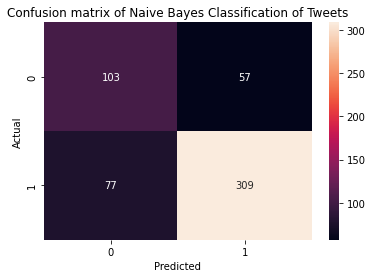

------------ Evaluation Metrics ----------------

F1 score: 0.822
Precision score: 0.844
Recall score: 0.801
Average precision-recall score: 0.817

--------- 5 fold cross validation ----------------

F1 score: 0.853
Precision score: 0.754
Recall score: 0.982

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



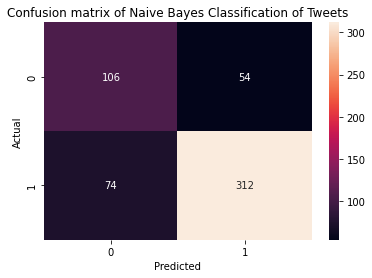

------------ Evaluation Metrics ----------------

F1 score: 0.830
Precision score: 0.852
Recall score: 0.808
Average precision-recall score: 0.825

--------- 5 fold cross validation ----------------

F1 score: 0.860
Precision score: 0.761
Recall score: 0.990

Model: Naive Bayes Classification
Preprocessing Function:  Text



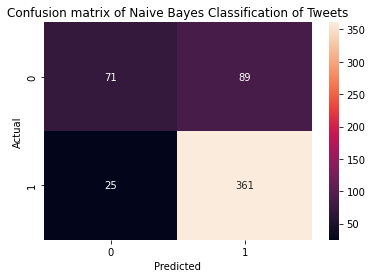

------------ Evaluation Metrics ----------------

F1 score: 0.864
Precision score: 0.802
Recall score: 0.935
Average precision-recall score: 0.796

--------- 5 fold cross validation ----------------

F1 score: 0.829
Precision score: 0.709
Recall score: 0.997

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



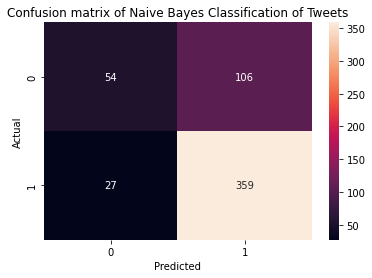

------------ Evaluation Metrics ----------------

F1 score: 0.844
Precision score: 0.772
Recall score: 0.930
Average precision-recall score: 0.767

--------- 5 fold cross validation ----------------

F1 score: 0.828
Precision score: 0.708
Recall score: 0.997

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



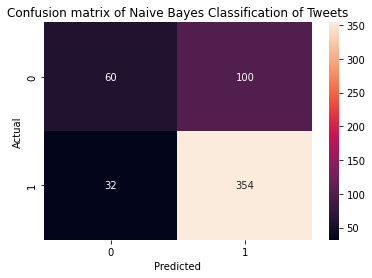

------------ Evaluation Metrics ----------------

F1 score: 0.843
Precision score: 0.780
Recall score: 0.917
Average precision-recall score: 0.774

--------- 5 fold cross validation ----------------

F1 score: 0.832
Precision score: 0.712
Recall score: 1.000

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



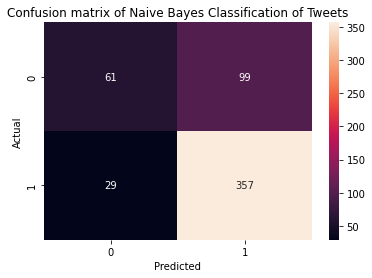

------------ Evaluation Metrics ----------------

F1 score: 0.848
Precision score: 0.783
Recall score: 0.925
Average precision-recall score: 0.777

--------- 5 fold cross validation ----------------

F1 score: 0.828
Precision score: 0.708
Recall score: 0.997

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



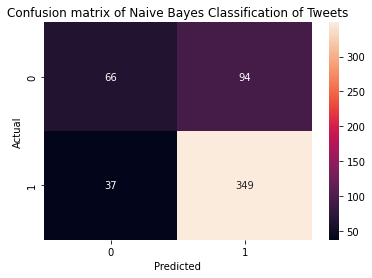

------------ Evaluation Metrics ----------------

F1 score: 0.842
Precision score: 0.788
Recall score: 0.904
Average precision-recall score: 0.780

--------- 5 fold cross validation ----------------

F1 score: 0.831
Precision score: 0.711
Recall score: 1.000

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



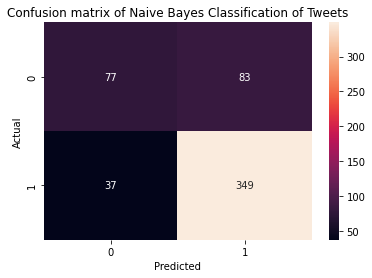

------------ Evaluation Metrics ----------------

F1 score: 0.853
Precision score: 0.808
Recall score: 0.904
Average precision-recall score: 0.798

--------- 5 fold cross validation ----------------

F1 score: 0.834
Precision score: 0.715
Recall score: 1.000



In [ ]:
preprocessings = ['Text', 'stemmed_text', 'cleaned_stemmed_text', 'lemmatized_text', 'cleaned_lemmatized_text', 'cleaned_text'] 
#Count Vectorizer
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

#TF-IDF
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

## **TF-IDF Vectorizer**

Model: Naive Bayes Classification
Preprocessing Function:  Text



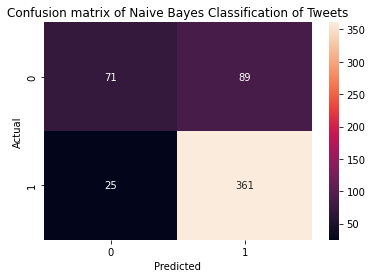

------------ Evaluation Metrics ----------------

F1 score: 0.864
Precision score: 0.802
Recall score: 0.935
Average precision-recall score: 0.796

--------- 5 fold cross validation ----------------

F1 score: 0.829
Precision score: 0.709
Recall score: 0.997

Model: K-Nearest Neighbour Classification
Best parameters: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
Preprocessing Function:  Text



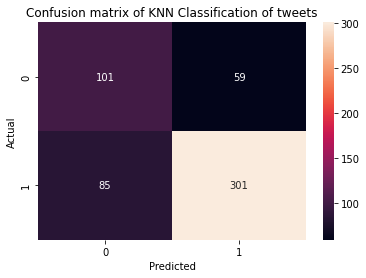

------------ Evaluation Metrics ----------------

F1 score: 0.807
Precision score: 0.836
Recall score: 0.780
Average precision-recall score: 0.808

--------- 5 fold cross validation ----------------

F1 score: 0.847
Precision score: 0.766
Recall score: 0.948

Model: Support Vector Machine Classification
Preprocessing Function:  Text
Best parameters: {'C': 10, 'degree': 0, 'gamma': 0.05, 'kernel': 'rbf'}



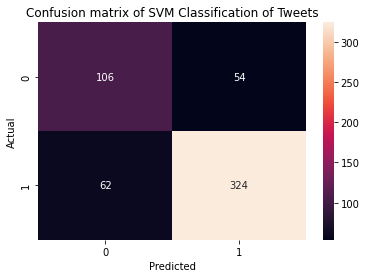

------------ Evaluation Metrics ----------------

F1 score: 0.848
Precision score: 0.857
Recall score: 0.839
Average precision-recall score: 0.833

--------- 5 fold cross validation ----------------

F1 score: 0.860
Precision score: 0.766
Recall score: 0.982

Model: Decision Tree Classification
Preprocessing Function:  Text
Best parameters: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}



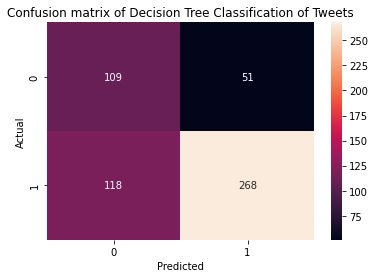

------------ Evaluation Metrics ----------------

F1 score: 0.760
Precision score: 0.840
Recall score: 0.694
Average precision-recall score: 0.799

--------- 5 fold cross validation ----------------

F1 score: 0.802
Precision score: 0.775
Recall score: 0.855

Model: Naive Bayes Classification
Preprocessing Function:  Text



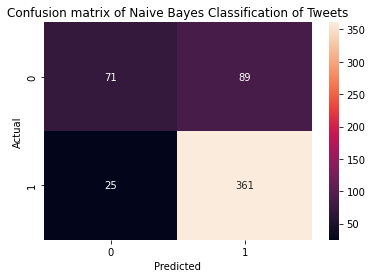

------------ Evaluation Metrics ----------------

F1 score: 0.864
Precision score: 0.802
Recall score: 0.935
Average precision-recall score: 0.796

--------- 5 fold cross validation ----------------

F1 score: 0.829
Precision score: 0.709
Recall score: 0.997



In [ ]:
preprocessing = 'Text'
x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                    df['Subjectivity'],
                                                    test_size = 0.2, 
                                                    random_state = 24)
    
vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
test_vector = vectorizer.transform(x_test[preprocessing])
    
naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)
KNNClassification(x_train, x_test, y_train, y_test, preprocessing)
SVMClassification(x_train, x_test, y_train, y_test, preprocessing)
decisionTreeClassification(x_train, x_test, y_train, y_test, preprocessing)


## **Visualizing Text Data based on Subjectivity**

In [ ]:
opinionated_df = df[df['Subjectivity'] == 1]
neutral_df = df[df['Subjectivity'] == 0]

In [ ]:
print(opinionated_df['Subjectivity'].unique())
print(neutral_df['Subjectivity'].unique())

[1]
[0]


Wordcloud function

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 80,
        max_font_size = 60, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (25, 25))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

Opinionated wordcloud

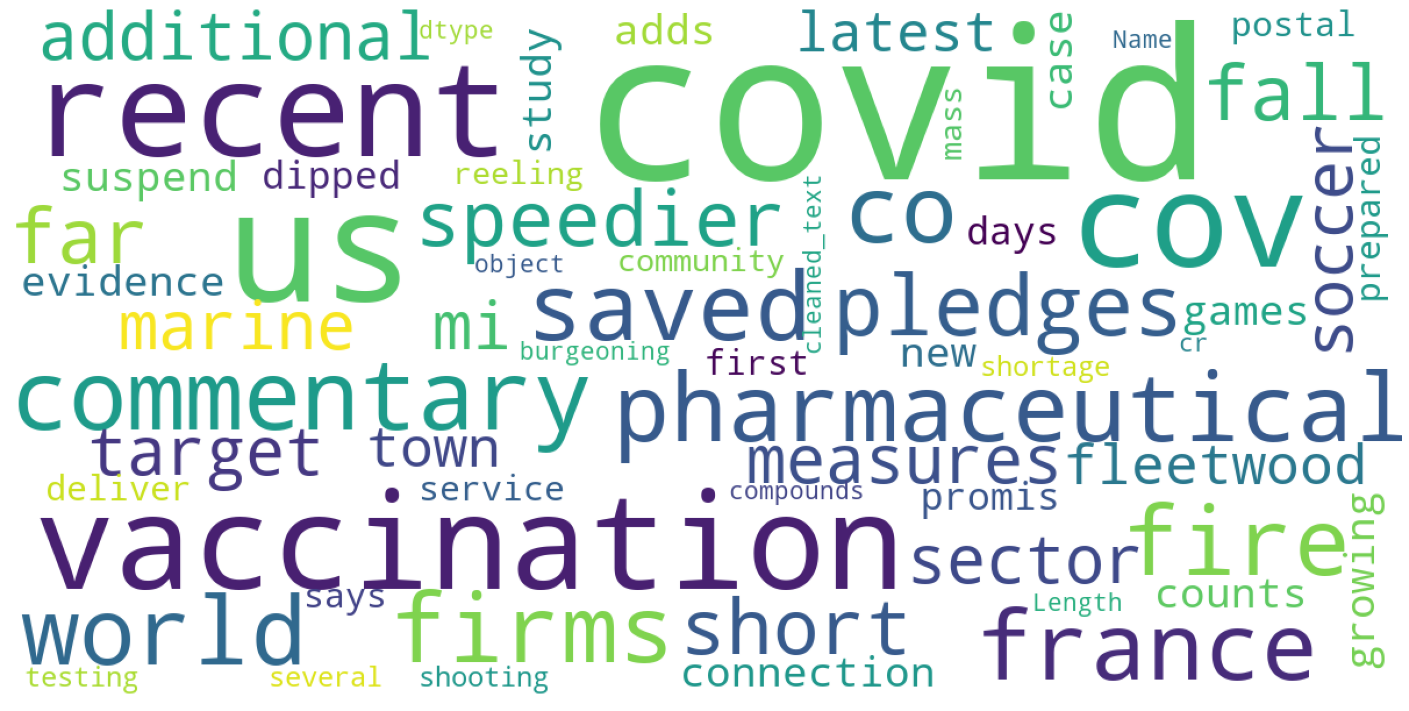

In [ ]:
show_wordcloud(opinionated_df["cleaned_text"])

Neutral wordcloud

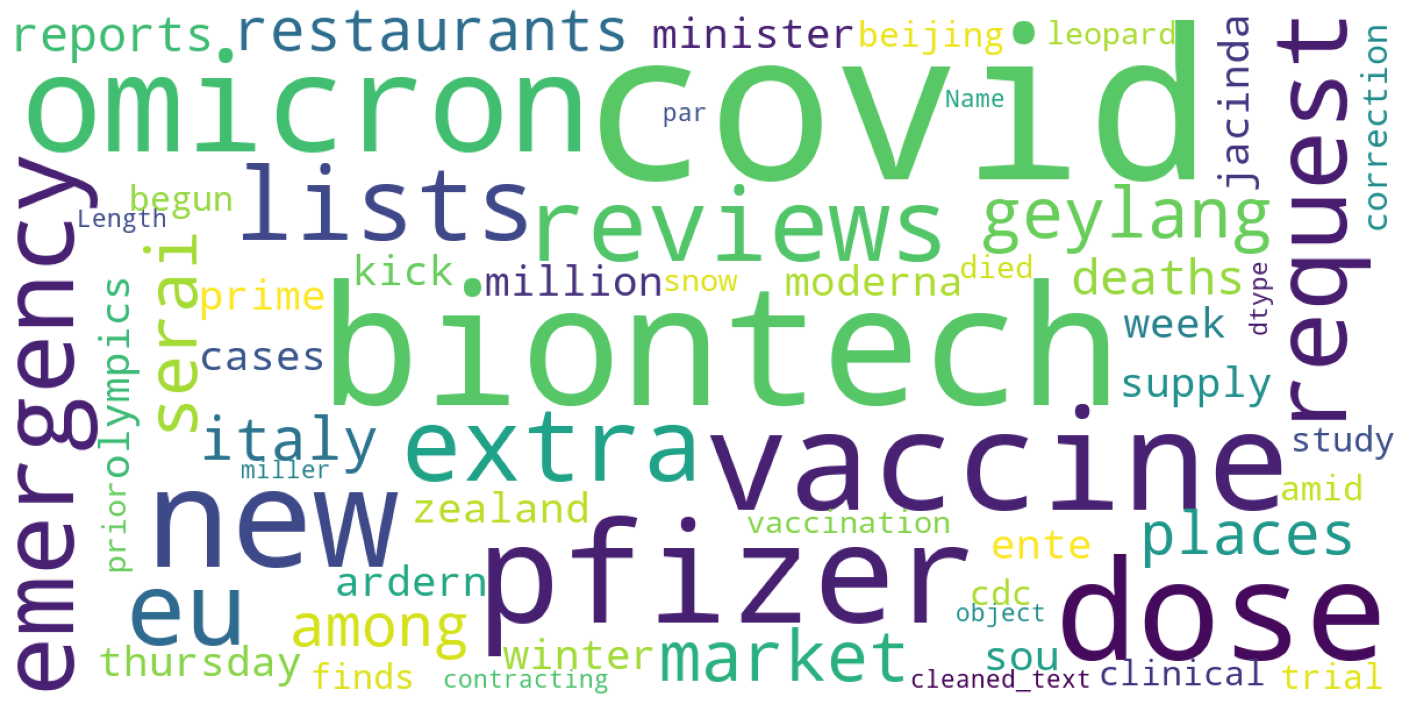

In [ ]:
show_wordcloud(neutral_df["cleaned_text"])

## **Enhanced Classification and Error Analysis**

In [ ]:
def enhancedClassification(x_train, x_test, y_train, y_test):
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train["Text"])
    test_vector = vectorizer.transform(x_test["Text"])

    clf = RandomForestClassifier() 

    param_grid = { 
        'n_estimators': [100, 800],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
    }

    grid_search = GridSearchCV(clf, param_grid, cv= 5)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_
    
    enhanced_model = RandomForestClassifier(bootstrap = grid_search.best_params_['bootstrap'],max_features = grid_search.best_params_['max_features'],n_estimators = grid_search.best_params_['n_estimators'])
    enhanced_model.fit(tweet_matrix, y_train)

    result = enhanced_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    
    print("==================================================")
    print("Model: Enhanced Classification")
    print("Preprocessing Function: ", preprocessing)
    print("Best parameters:", grid_search.best_params_)
    print("==================================================")
    print()
    plt.title("Confusion matrix of Random Forest Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    
    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    
    
    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(enhanced_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(enhanced_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(enhanced_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()
    
    
    # ==================================================
    # Error Analysis 
    # ==================================================
    
    print("---------------- Error Analysis ------------------")
    print()
    enhanced_df = pd.concat([x_test,y_test], axis=1)
    enhanced_df['predicted'] = result
    enhanced_df.head()

    pd.set_option('display.max_rows', 300)
    pd.set_option('display.max_colwidth', -1)
    wrong_df = enhanced_df[enhanced_df['Subjectivity'] != enhanced_df['predicted']]
    wrong_df['length'] = wrong_df['Text'].str.len()
    wrong_df = wrong_df.sort_values(by=['Subjectivity','length'], ascending=[False, True])

    wrong_df.to_csv('wrongly_classified.csv', index=False)

    plt.figure(figsize=(8,10))
    ax = sns.countplot(x='Subjectivity', data=wrong_df);



Model: Enhanced Classification
Preprocessing Function:  Text
Best parameters: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 800}



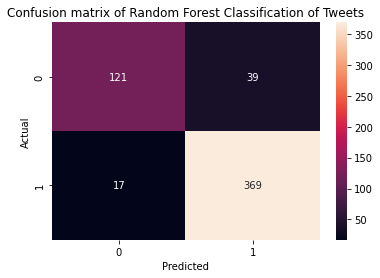

------------ Evaluation Metrics ----------------

F1 score: 0.929
Precision score: 0.904
Recall score: 0.956
Average precision-recall score: 0.896
--------- 5 fold cross validation ----------------

F1 score: 0.867
Precision score: 0.778
Recall score: 0.984

---------------- Error Analysis ------------------



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


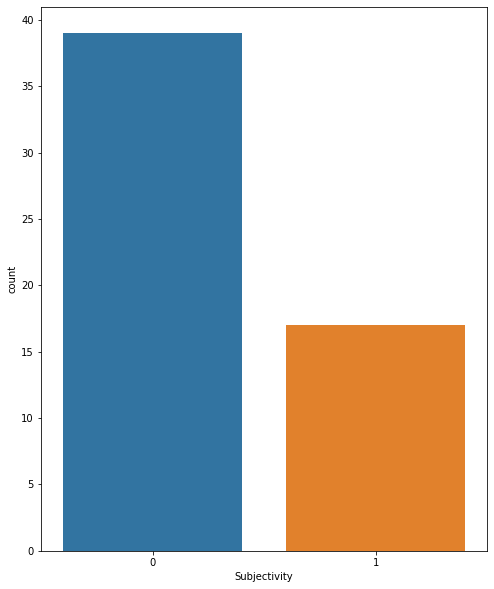

In [ ]:
enhancedClassification(x_train, x_test, y_train, y_test)

# ***Polarity Classification*** 

Filter out those with subjectivity = 1

In [ ]:
df = df.loc[df["Subjectivity"] == 1]

In [ ]:
df.head()

,TweetId,Text,Subjectivity,Polarity,stemmed_text,lemmatized_text,cleaned_text,cleaned_stemmed_text,cleaned_lemmatized_text
1,1.340000e+18,commentary pharmaceutical firms saved the world with covid vaccine in record time but credit goes to others too,1,1,commentari pharmaceut firm save the world with covid vaccin in record time but credit goe to other too,commentary pharmaceutical firm saved the world with covid vaccine in record time but credit go to others too,commentary pharmaceutical firms saved world covid vaccine record time credit goes others,commentari pharmaceut firm save world covid vaccin record time credit goe,commentary pharmaceutical firm saved world covid vaccine record time credit go others
2,1.340000e+18,under fire france pledges speedier covid vaccination rollout,1,0,under fire franc pledg speedier covid vaccin rollout,under fire france pledge speedier covid vaccination rollout,fire france pledges speedier covid vaccination rollout,fire franc pledg speedier covid vaccin rollout,fire france pledge speedier covid vaccination rollout
4,1.340000e+18,us covid vaccinations in fall far short of target of million people,1,0,us covid vaccin in fall far short of target of million peopl,u covid vaccination in fall far short of target of million people,us covid vaccinations fall far short target million people,us covid vaccin fall far short target million peopl,u covid vaccination fall far short target million people
5,1.340000e+18,additional covid measures for marine sector after recent cases form family clusters,1,0,addit covid measur for marin sector after recent case form famili cluster,additional covid measure for marine sector after recent case form family cluster,additional covid measures marine sector recent cases form family clusters,addit covid measur marin sector recent case form famili cluster,additional covid measure marine sector recent case form family cluster
6,1.340000e+18,soccer fleetwood town latest to suspend games after covid outbreak at club,1,0,soccer fleetwood town latest to suspend game after covid outbreak at club,soccer fleetwood town latest to suspend game after covid outbreak at club,soccer fleetwood town latest suspend games covid outbreak club,soccer fleetwood town latest suspend game covid outbreak club,soccer fleetwood town latest suspend game covid outbreak club


## **Experiment to find the best preprocessing for Polarity Classification**

Model: Naive Bayes Classification
Preprocessing Function:  Text



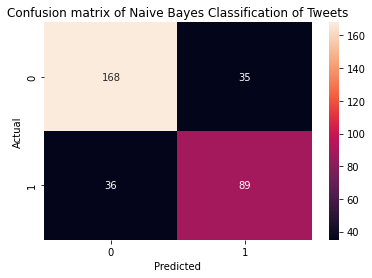

------------ Evaluation Metrics ----------------

F1 score: 0.715
Precision score: 0.718
Recall score: 0.712
Average precision-recall score: 0.621

--------- 5 fold cross validation ----------------

F1 score: 0.584
Precision score: 0.717
Recall score: 0.496

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



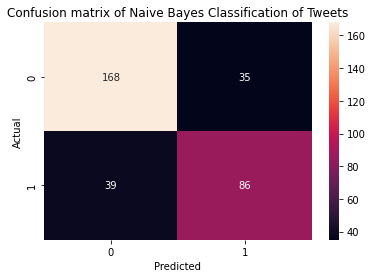

------------ Evaluation Metrics ----------------

F1 score: 0.699
Precision score: 0.711
Recall score: 0.688
Average precision-recall score: 0.608

--------- 5 fold cross validation ----------------

F1 score: 0.594
Precision score: 0.695
Recall score: 0.520

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



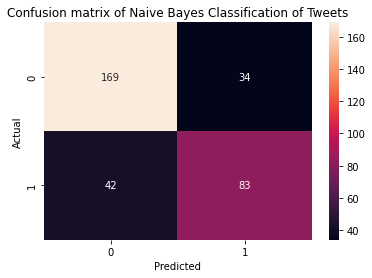

------------ Evaluation Metrics ----------------

F1 score: 0.686
Precision score: 0.709
Recall score: 0.664
Average precision-recall score: 0.599

--------- 5 fold cross validation ----------------

F1 score: 0.579
Precision score: 0.716
Recall score: 0.488

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



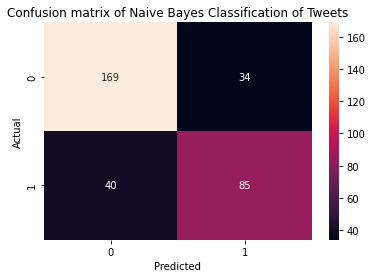

------------ Evaluation Metrics ----------------

F1 score: 0.697
Precision score: 0.714
Recall score: 0.680
Average precision-recall score: 0.608

--------- 5 fold cross validation ----------------

F1 score: 0.587
Precision score: 0.707
Recall score: 0.504

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



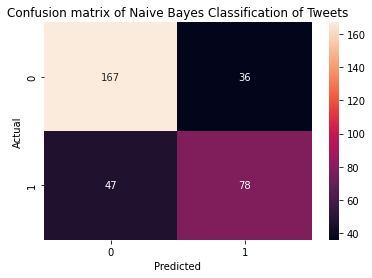

------------ Evaluation Metrics ----------------

F1 score: 0.653
Precision score: 0.684
Recall score: 0.624
Average precision-recall score: 0.570

--------- 5 fold cross validation ----------------

F1 score: 0.575
Precision score: 0.722
Recall score: 0.480

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



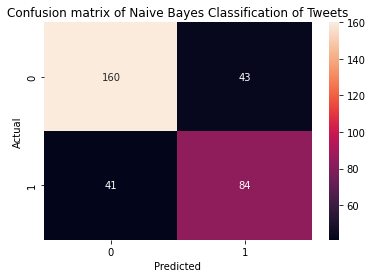

------------ Evaluation Metrics ----------------

F1 score: 0.667
Precision score: 0.661
Recall score: 0.672
Average precision-recall score: 0.569

--------- 5 fold cross validation ----------------

F1 score: 0.597
Precision score: 0.737
Recall score: 0.504

Model: Naive Bayes Classification
Preprocessing Function:  Text



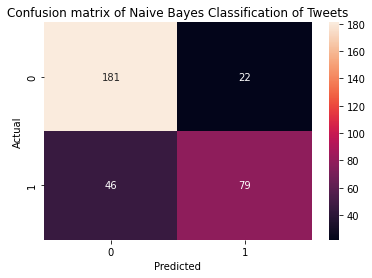

------------ Evaluation Metrics ----------------

F1 score: 0.699
Precision score: 0.782
Recall score: 0.632
Average precision-recall score: 0.635

--------- 5 fold cross validation ----------------

F1 score: 0.221
Precision score: 0.833
Recall score: 0.128

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



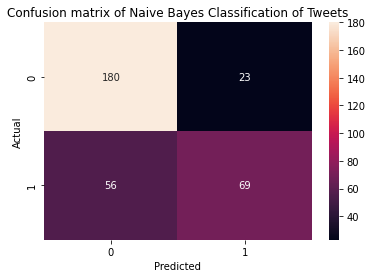

------------ Evaluation Metrics ----------------

F1 score: 0.636
Precision score: 0.750
Recall score: 0.552
Average precision-recall score: 0.585

--------- 5 fold cross validation ----------------

F1 score: 0.209
Precision score: 0.833
Recall score: 0.120

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



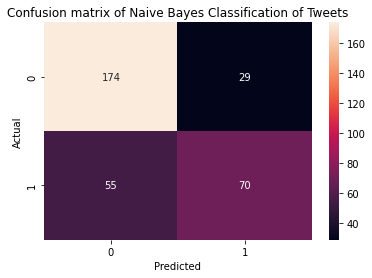

------------ Evaluation Metrics ----------------

F1 score: 0.625
Precision score: 0.707
Recall score: 0.560
Average precision-recall score: 0.564

--------- 5 fold cross validation ----------------

F1 score: 0.218
Precision score: 0.767
Recall score: 0.128

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



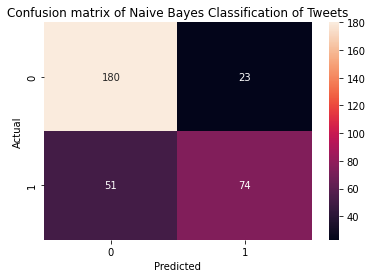

------------ Evaluation Metrics ----------------

F1 score: 0.667
Precision score: 0.763
Recall score: 0.592
Average precision-recall score: 0.607

--------- 5 fold cross validation ----------------

F1 score: 0.194
Precision score: 0.783
Recall score: 0.112

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



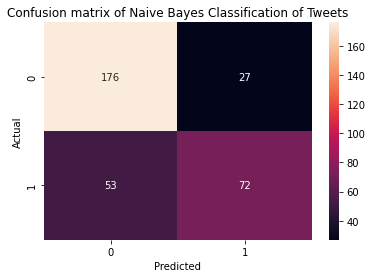

------------ Evaluation Metrics ----------------

F1 score: 0.643
Precision score: 0.727
Recall score: 0.576
Average precision-recall score: 0.580

--------- 5 fold cross validation ----------------

F1 score: 0.172
Precision score: 0.708
Recall score: 0.104

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



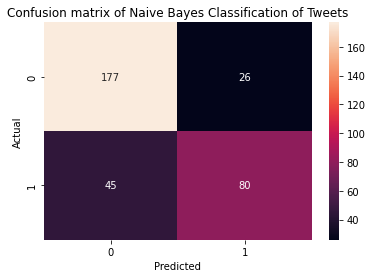

------------ Evaluation Metrics ----------------

F1 score: 0.693
Precision score: 0.755
Recall score: 0.640
Average precision-recall score: 0.620

--------- 5 fold cross validation ----------------

F1 score: 0.199
Precision score: 0.742
Recall score: 0.120



In [ ]:
preprocessings = ['Text', 'stemmed_text', 'cleaned_stemmed_text', 'lemmatized_text', 'cleaned_lemmatized_text', 'cleaned_text'] 
#Count Vectorizer
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

#TF-IDF
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

## **Count Vectorizer**

Model: Naive Bayes Classification
Preprocessing Function:  Text



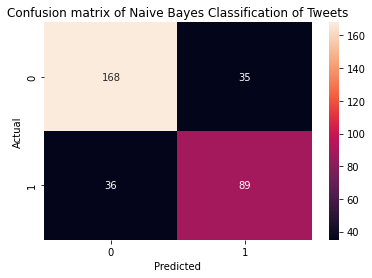

------------ Evaluation Metrics ----------------

F1 score: 0.715
Precision score: 0.718
Recall score: 0.712
Average precision-recall score: 0.621

--------- 5 fold cross validation ----------------

F1 score: 0.584
Precision score: 0.717
Recall score: 0.496

Model: K-Nearest Neighbour Classification
Best parameters: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
Preprocessing Function:  Text



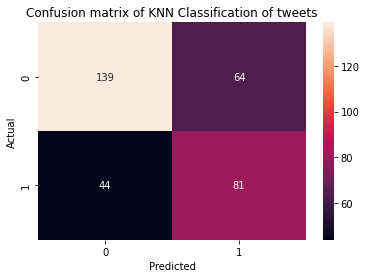

------------ Evaluation Metrics ----------------

F1 score: 0.600
Precision score: 0.559
Recall score: 0.648
Average precision-recall score: 0.496

--------- 5 fold cross validation ----------------

F1 score: 0.596
Precision score: 0.623
Recall score: 0.584

Model: Support Vector Machine Classification
Preprocessing Function:  Text
Best parameters: {'C': 1, 'degree': 1, 'gamma': 0.2, 'kernel': 'poly'}



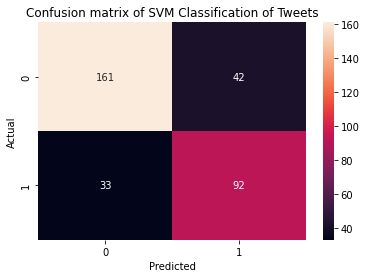

------------ Evaluation Metrics ----------------

F1 score: 0.710
Precision score: 0.687
Recall score: 0.736
Average precision-recall score: 0.606

--------- 5 fold cross validation ----------------

F1 score: 0.655
Precision score: 0.725
Recall score: 0.600

Model: Decision Tree Classification
Preprocessing Function:  Text
Best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}



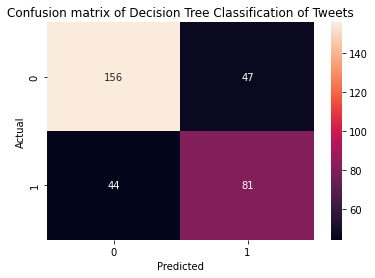

------------ Evaluation Metrics ----------------

F1 score: 0.640
Precision score: 0.633
Recall score: 0.648
Average precision-recall score: 0.544

--------- 5 fold cross validation ----------------

F1 score: 0.509
Precision score: 0.550
Recall score: 0.336



In [ ]:
preprocessing = 'Text'
x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                    df['Polarity'],
                                                    test_size = 0.2, 
                                                    random_state = 24)
    
vectorizer = CountVectorizer(ngram_range=(1,2))
tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
test_vector = vectorizer.transform(x_test[preprocessing])
   
naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)
KNNClassification(x_train, x_test, y_train, y_test, preprocessing)
SVMClassification(x_train, x_test, y_train, y_test, preprocessing)
decisionTreeClassification(x_train, x_test, y_train, y_test, preprocessing)


## **Enhanced Classification and Error Analysis**

In [ ]:
def enhancedClassification(x_train, x_test, y_train, y_test):
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train["Text"])
    test_vector = vectorizer.transform(x_test["Text"])

    clf = RandomForestClassifier() 

    param_grid = { 
        'n_estimators': [100, 800],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
    }

    grid_search = GridSearchCV(clf, param_grid, cv= 5)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_
    
    enhanced_model = RandomForestClassifier(bootstrap = grid_search.best_params_['bootstrap'],max_features = grid_search.best_params_['max_features'],n_estimators = grid_search.best_params_['n_estimators'])
    enhanced_model.fit(tweet_matrix, y_train)

    result = enhanced_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    
    print("==================================================")
    print("Model: Enhanced Classification")
    print("Preprocessing Function: ", preprocessing)
    print("Best parameters:", grid_search.best_params_)
    print("==================================================")
    print()
    plt.title("Confusion matrix of Random Forest Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    
    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    
    
    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(enhanced_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(enhanced_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(enhanced_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()
    
    
    # ==================================================
    # Error Analysis 
    # ==================================================
    
    print("---------------- Error Analysis ------------------")
    print()
    enhanced_df = pd.concat([x_test,y_test], axis=1)
    enhanced_df['predicted'] = result
    enhanced_df.head()

    pd.set_option('display.max_rows', 300)
    pd.set_option('display.max_colwidth', -1)
    wrong_df = enhanced_df[enhanced_df['Polarity'] != enhanced_df['predicted']]
    wrong_df['length'] = wrong_df['Text'].str.len()
    wrong_df = wrong_df.sort_values(by=['Polarity','length'], ascending=[False, True])

    wrong_df.to_csv('wrongly_classified.csv', index=False)

    plt.figure(figsize=(8,10))
    ax = sns.countplot(x='Polarity', data=wrong_df);



Model: Enhanced Classification
Preprocessing Function:  Text
Best parameters: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}



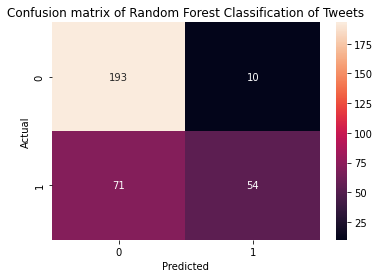

------------ Evaluation Metrics ----------------

F1 score: 0.571
Precision score: 0.844
Recall score: 0.432
Average precision-recall score: 0.581
--------- 5 fold cross validation ----------------

F1 score: 0.558
Precision score: 0.734
Recall score: 0.480

---------------- Error Analysis ------------------



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


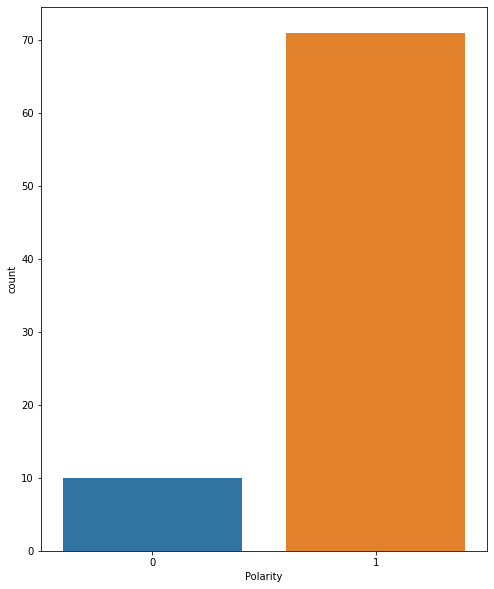

In [ ]:
enhancedClassification(x_train, x_test, y_train, y_test)

## **Visualizing Text Data based on Polarity**

In [ ]:
positive_df = df[df['Polarity'] == 1]
negative_df = df[df['Polarity'] == 0]

print(positive_df['Polarity'].unique())
print(negative_df['Polarity'].unique())

[1]
[0]


Positive wordcloud

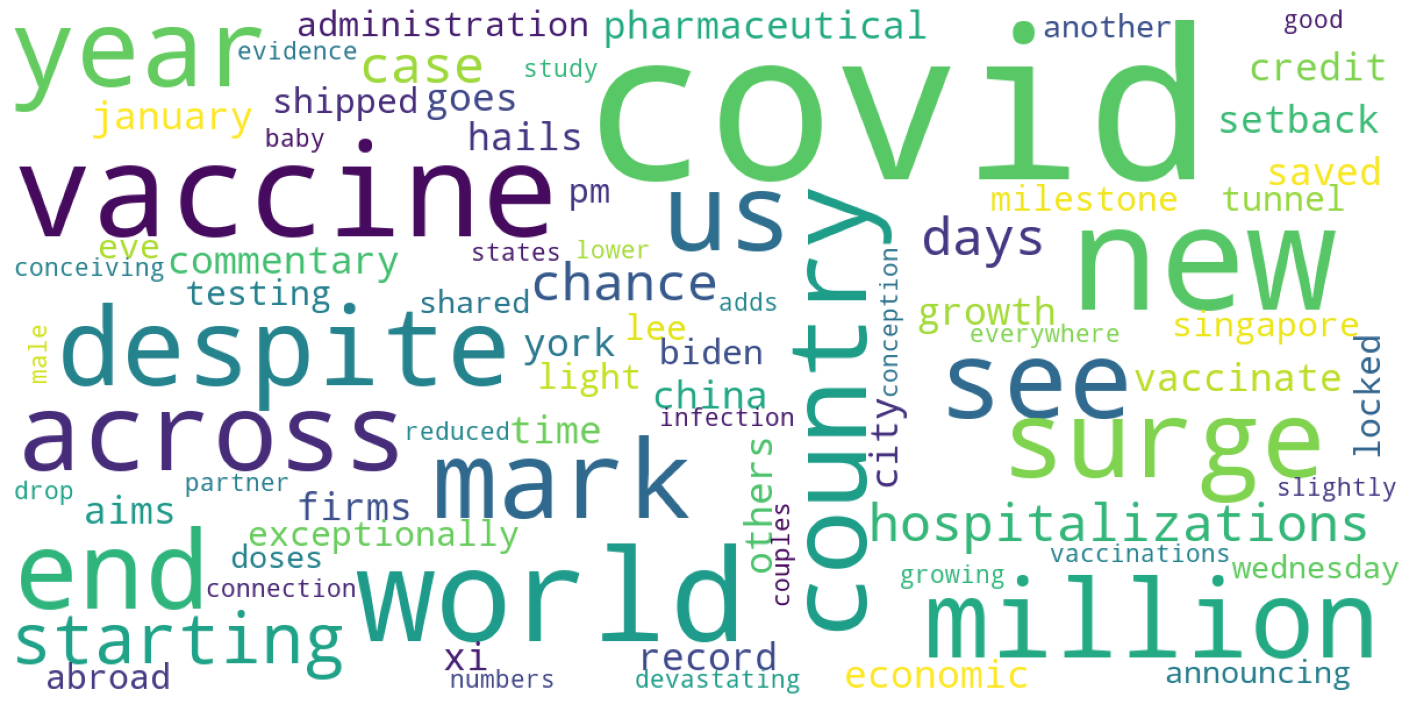

In [ ]:
show_wordcloud(positive_df["cleaned_text"])

Negative wordcloud

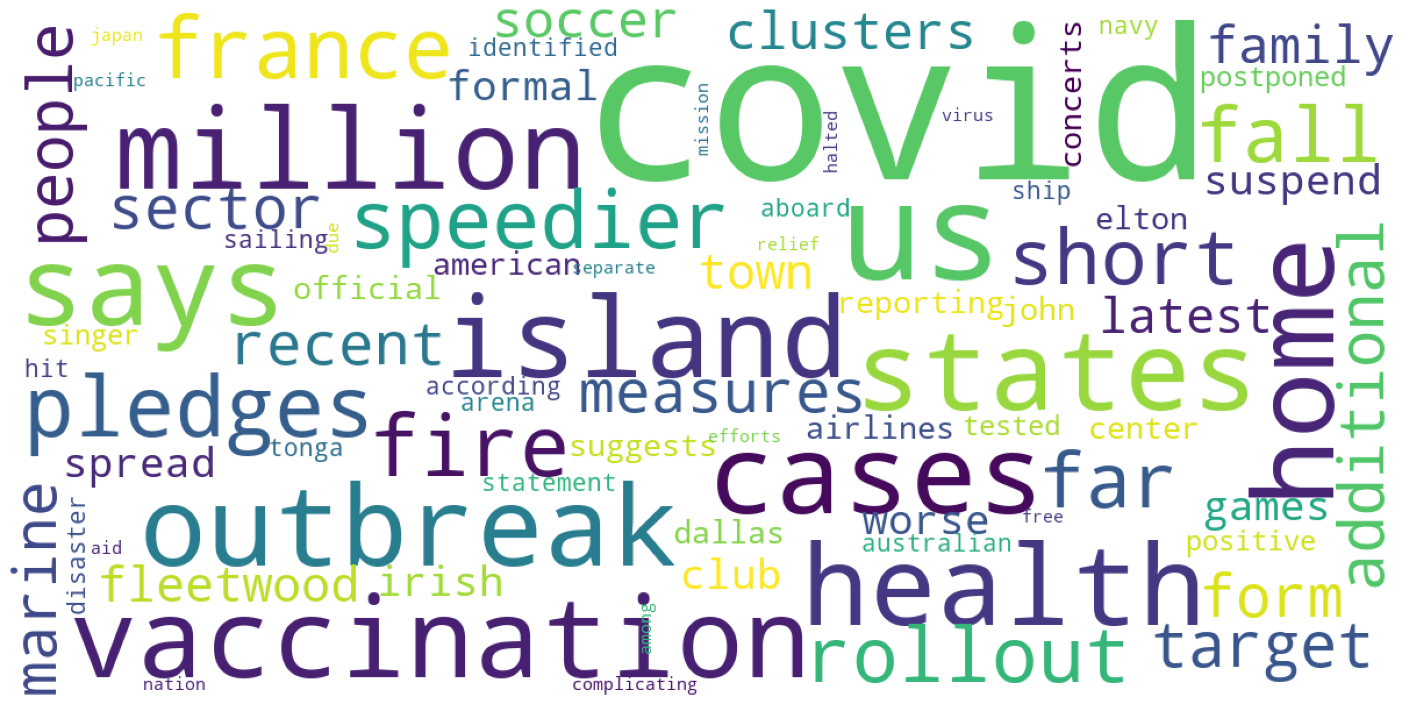

In [ ]:
show_wordcloud(negative_df["cleaned_text"])

# **Average Tweet Length**

In [ ]:
wordcount = df['Text'].apply(lambda x: len(x.split())).sum()

wordlength = wordcount / df.shape[0]
print ("The average number of words in a tweet is %.2f" % wordlength)

The average number of words in a tweet is 17.10


# **Tweets classified per second**

In [ ]:
# Number of tweets classified
numOfTweets = 0.2 * df.shape[0]

In [ ]:
import timeit

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['Text']], 
                                                        df['Subjectivity'],
                                                        test_size=0.2, 
                                                        random_state=42)

vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
tweet_matrix = vectorizer.fit_transform(x_train['Text'])
test_vector = vectorizer.transform(x_test['Text'])

In [ ]:
nbtraintime = '''
def nbtrain():
  naiveBayes_model = MultinomialNB().fit(tweet_matrix, y_train)
'''

In [ ]:
print(timeit.timeit(stmt = nbtraintime))

0.10369022399981986


In [ ]:
nbtime = ''' 
def nbmodel():
  naiveBayes_model.predict(test_vector)
'''

In [ ]:
print(timeit.timeit(stmt = nbtime))

0.07668575800016697


In [ ]:
# Tweets classified per second for Naive Bayes Classification
numOfTweets/0.06840510799975164

4783.268524350375

In [ ]:
knntraintime = '''
def knntrain():
  metric = ['euclidean', 'manhattan', 'cosine']
  neighbors = list(range(1,30))
  leaf_size = list(range(1,50))
  weight = ['uniform', 'distance']
  param_grid = {'metric' : metric, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}

  grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
  grid_search.fit(test_vector, y_test)
  grid_search.best_params_

  knn_model = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], metric= grid_search.best_params_['metric'], leaf_size = grid_search.best_params_['leaf_size'], weights = grid_search.best_params_['weights'])
  knn_model.fit(tweet_matrix, y_train)
'''

In [ ]:
print(timeit.timeit(stmt = knntraintime))

0.08067974999994476


In [ ]:
knntime = '''
def knnmodel():
  knn_model.predict(test_vector)
'''
    

In [ ]:
print(timeit.timeit(stmt = knntime))

0.08039832399981606


In [ ]:
# Tweets classified per second for KNN
numOfTweets/0.06451427699994383

5071.745592069255

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['Text']], 
                                                        df['Polarity'],
                                                        test_size=0.2, 
                                                        random_state=42)

vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
tweet_matrix = vectorizer.fit_transform(x_train['Text'])
test_vector = vectorizer.transform(x_test['Text'])

In [ ]:
knntraintime = '''
def knntrain():
  metric = ['euclidean', 'manhattan', 'cosine']
  neighbors = list(range(1,30))
  leaf_size = list(range(1,50))
  weight = ['uniform', 'distance']
  param_grid = {'metric' : metric, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}

  grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
  grid_search.fit(test_vector, y_test)
  grid_search.best_params_

  knn_model = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], metric= grid_search.best_params_['metric'], leaf_size = grid_search.best_params_['leaf_size'], weights = grid_search.best_params_['weights'])
  knn_model.fit(tweet_matrix, y_train)
'''

In [ ]:
print(timeit.timeit(stmt = knntraintime))

0.0848656220000521


In [ ]:
knntime = '''
def knnmodel():
  knn_model.predict(test_vector)
'''
    

In [ ]:
print(timeit.timeit(stmt = knntime))

0.08259632799990868


In [ ]:
# Tweets classified per second for KNN
numOfTweets/0.06420844899912481

5095.902565789433

In [ ]:
svmtraintime = '''
def svmtrain():
  Cs = [0.001, 0.01, 0.1, 1, 10]
  gammas = [0.05, 0.1, 0.15, 0.20, 0.25]
  degrees = [0, 1, 2, 3, 4, 5, 6]
  kernels = ['rbf', 'linear', 'poly']
  param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees, 'kernel' : kernels}

  grid_search = GridSearchCV(svm.SVC(), param_grid, cv = 3)
  grid_search.fit(test_vector, y_test)
  grid_search.best_params_

  SVM_model = svm.SVC(C = grid_search.best_params_['C'], kernel = grid_search.best_params_['kernel'], gamma = grid_search.best_params_['gamma'], degree = grid_search.best_params_['degree'])
  SVM_model.fit(tweet_matrix, y_train)
'''

In [ ]:
print(timeit.timeit(stmt = svmtraintime))

0.08118266500014215


In [ ]:
svmtime = '''
def svmmodel():
  SVM_model.predict(test_vector)
'''

In [ ]:
print(timeit.timeit(stmt = svmtime))

0.07885161800004425


In [ ]:
# Tweets classified per second for SVM
numOfTweets/0.06364962799943896

5140.6427701805915

# **Visualizing Text Data using pyLDAvis**

---



## **Preprocessing of data**

Tokenization

In [ ]:
spacy.load('en_core_web_sm')  
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

Lemmatization

In [ ]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

Stopwords

In [ ]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing Function

In [ ]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IR_4034_Proj/Data/covid_data.csv')

In [ ]:
df = df['Text']
df.head()

0    WHO lists Pfizer-BioNTech COVID-19 vaccine for emergency use https://t.co/T5Z7wsVQQc https://t.co/NPkPodAhQX                                                        
1    Commentary: Pharmaceutical firms saved the world with COVID-19 vaccine in record time. But credit goes to others too https://t.co/I77T2FoZRJ https://t.co/6B3HNJPmnM
2    Under fire, France pledges speedier COVID-19 vaccination rollout https://t.co/TxkEsMXw2H https://t.co/6hX70DU259                                                    
3    EU reviews BioNTech request for 'extra dose' of COVID-19 vaccine https://t.co/leiQJjZdKS https://t.co/tHaSTnkFlT                                                    
4    US COVID-19 vaccinations in 2020 fall far short of target of 20 million people https://t.co/EPVDME8pR6 https://t.co/KgsYkm4Wh9                                      
Name: Text, dtype: object

Preprocessing of Text and add it to a list

In [ ]:
text_data = []
for line in df:
    tokens = prepare_text_for_lda(line)
    if random.random() > .79:
        text_data.append(tokens)

## **Latent Dirichlet Allocation (LDA) using Gensim**

In [ ]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

Total number of tokens

In [ ]:
len(dictionary)

4425

#### **Preparing the models**

Save corpus and dictionary for use during visualization

In [ ]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [ ]:
ldamodel1 = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes = 15)
topics = ldamodel1.print_topics(num_words = 5)
# for topic in topics:
#     print(topic)

In [ ]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary, passes = 15)
topics = ldamodel2.print_topics(num_words = 5)
# for topic in topics:
#     print(topic)

In [ ]:
ldamodel3 = gensim.models.ldamodel.LdaModel(corpus, num_topics = 25, id2word = dictionary, passes = 15)
topics = ldamodel3.print_topics(num_words = 5)
# for topic in topics:
#     print(topic)

In [ ]:
ldamodel4 = gensim.models.ldamodel.LdaModel(corpus, num_topics = 50, id2word = dictionary, passes = 15)
topics = ldamodel4.print_topics(num_words = 5)
# for topic in topics:
#     print(topic)

In [ ]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))

#### **Displaying the models**

In [ ]:
lda = ldamodel2
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


In [ ]:
lda = ldamodel3
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


In [ ]:
lda = ldamodel4
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)
